## Linear regression

In [19]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

#### Declare some visual functions

In [20]:
def plot_actual_vs_predicted(X_validation, y_actual, y_pred, feature, xlabel, ylabel):
    """
    Draw a scatter plot comparing actual and predicted values for a specific feature.

    Parameters:
    X_validation (pd.DataFrame): Input data containing the feature to be plotted.
    y_actual (array-like): Actual value.
    y_pred (array-like): Predicted value.
    feature (str): Column name in X_validation to compare.
    xlabel (str): Label for the X-axis (name of the feature displayed on the chart).
    ylabel (str): Label for the Y-axis (e.g. Price, Area, ...).
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(X_validation[feature], y_actual, c='r', marker='o', label="Actual values", alpha=0.5) 
    plt.scatter(X_validation[feature], y_pred, c='b', marker='s', label="Predicted values", alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(f"Scatter Plot of Actual vs Predicted {ylabel} per {xlabel}")
    plt.show()


#### Select feature

##### Read data

- Practice training

In [21]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường 5,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,1.297950,4,6,5.0,-1.877091,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.832029,4,6,8.0,-1.869076,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,10.400602,4.003590,10.000000,2.236068,0.133147,4,5,6.0,-1.823661,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
3,10.398891,4.009621,10.000000,2.236068,0.133147,4,5,4.0,-1.823661,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
4,10.399521,4.008289,8.660254,2.236068,-1.031655,4,6,4.0,-1.807632,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


##### Input variables

- Practice training

In [22]:
x = df.drop(columns=["Price", "Legal Status"])
x.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,House Direction,Ward Name_Phường An Hải Bắc,Ward Name_Phường An Hải Tây,Ward Name_Phường An Hải Đông,...,Street Name_đường 5,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,1.297950,4,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.832029,4,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,10.400602,4.003590,10.000000,2.236068,0.133147,4,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1
3,10.398891,4.009621,10.000000,2.236068,0.133147,4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
4,10.399521,4.008289,8.660254,2.236068,-1.031655,4,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


##### Target variables

- Practice training

In [23]:
y = df[['Price']]
y.head()

,Price
0,-1.877091
1,-1.869076
2,-1.823661
3,-1.823661
4,-1.807632


##### Divide into 2 training sets and validation sets

 - Split data

In [24]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3, random_state=43)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(1857, 1265) (797, 1265)
(1857, 1) (797, 1)


#### Model training

##### Create a linear regression model object from the linear_model library and train it with input and target variables

In [25]:
regr = linear_model.LinearRegression(fit_intercept=True) 
regr.fit(X_train, y_train)

LinearRegression()

##### Correlation Coefficient and Intercept Deviation Value

In [26]:
print( 'Coefficient : ', regr.coef_ )
print( 'Interception  : ', regr.intercept_ )

Coefficient :  [[-1.74232955e+02 -6.18612991e+01  3.85355567e-01 ...  1.50981903e-01
   1.18072510e-01  1.10290527e-01]]
Interception  :  [-3.20777152e+10]


##### Real estate price prediction

- On the train set

In [27]:
y_pred_train = regr.predict(X_train)
y_pred_train

array([[-1.20048904],
       [-0.25647354],
       [ 0.31359863],
       ...,
       [ 0.61008453],
       [ 0.67016983],
       [-0.03382492]])

- Prediction on validation set

In [37]:
y_pred_validation = regr.predict(X_validation)
y_pred_validation

array([[ 1.55651093e-01],
       [-2.20550537e-01],
       [-6.96945190e-03],
       [ 1.25629425e-01],
       [ 4.46979523e-01],
       [-6.15213835e+09],
       [ 7.65914917e-02],
       [-2.03033447e-01],
       [-7.48828888e-01],
       [-2.03033447e-01],
       [-2.02548981e-01],
       [ 7.80517578e-01],
       [-5.82244873e-01],
       [-7.24891663e-01],
       [ 3.76502991e-01],
       [-1.40721130e+00],
       [ 2.61118317e+00],
       [-8.20209503e-01],
       [-1.40352631e+00],
       [-6.95050785e+10],
       [-6.15213835e+09],
       [-4.60628510e-01],
       [-6.15213835e+09],
       [-4.43195343e-01],
       [ 1.15609670e+11],
       [ 3.48670959e-01],
       [-1.25038147e-01],
       [-6.15213835e+09],
       [ 1.67034149e-01],
       [-2.41489410e-01],
       [ 1.91379547e-01],
       [ 1.40394592e+00],
       [-1.13927766e+11],
       [ 3.76471058e+09],
       [ 3.76471058e+09],
       [-4.17366028e-01],
       [-1.19937897e-01],
       [ 7.30766296e-01],
       [ 3.7

#### Model Evaluation

##### Calculation of mean square error MSE

- Train set

In [29]:
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.07359846071600651


- Validation set

In [30]:
mse = mean_squared_error(y_validation, y_pred_validation)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 7.632896405940252e+20


##### R-squared tells us how much of the target variable the input variables can explain. The larger the R-squared, the better the model. When R-squared is 95%, it means that the input variables have explained 95% of the variation in the target variable.

- Train set

In [31]:
R_squared = r2_score(y_train, y_pred_train)
print("R² Score:", R_squared)

R² Score: 0.9291534791942135


- Validation set

In [32]:
R_squared = r2_score(y_validation, y_pred_validation)
print("R² Score:", R_squared)

R² Score: -8.395116034899359e+20


##### 4.3 MAPE is an index that measures the percentage error between the forecast value and the actual value (mean absolute percentage error) <br> When a model has MAPE = 5%, we say that the model has an average error of 5% compared to the average value

- Train set

In [33]:
mape = mean_absolute_percentage_error(y_train, y_pred_train)
print("MAPE:", mape)

MAPE: 0.6161400231412785


- Validation set

In [34]:
mape = mean_absolute_percentage_error(y_validation, y_pred_validation)
print("MAPE:", mape)

MAPE: 47714438205.87124


##### Visualization of the *Price* characteristic difference between the initial value and the predicted value

- Training set

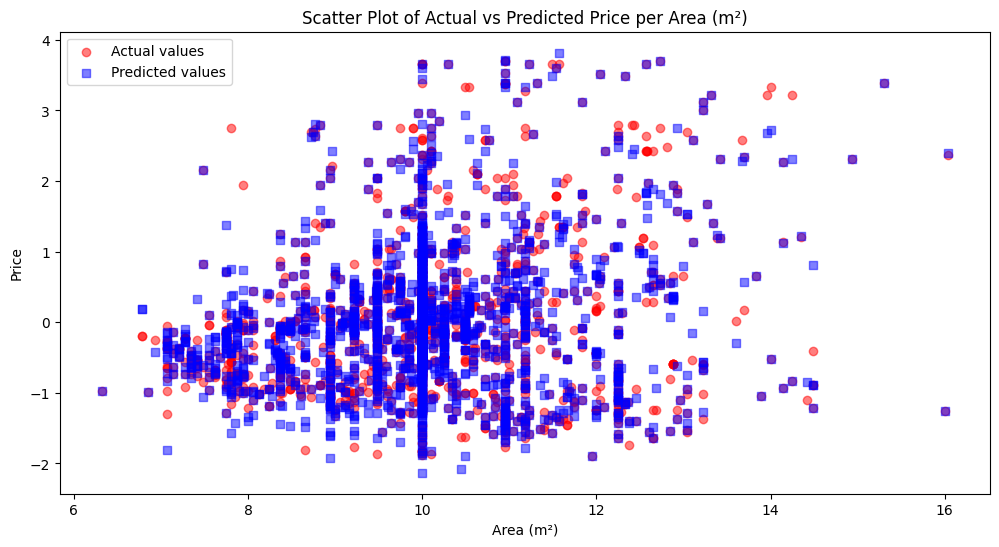

In [35]:
plot_actual_vs_predicted(X_train, y_train, y_pred_train, "Area (m²)", "Area (m²)", "Price")

- Validation set 

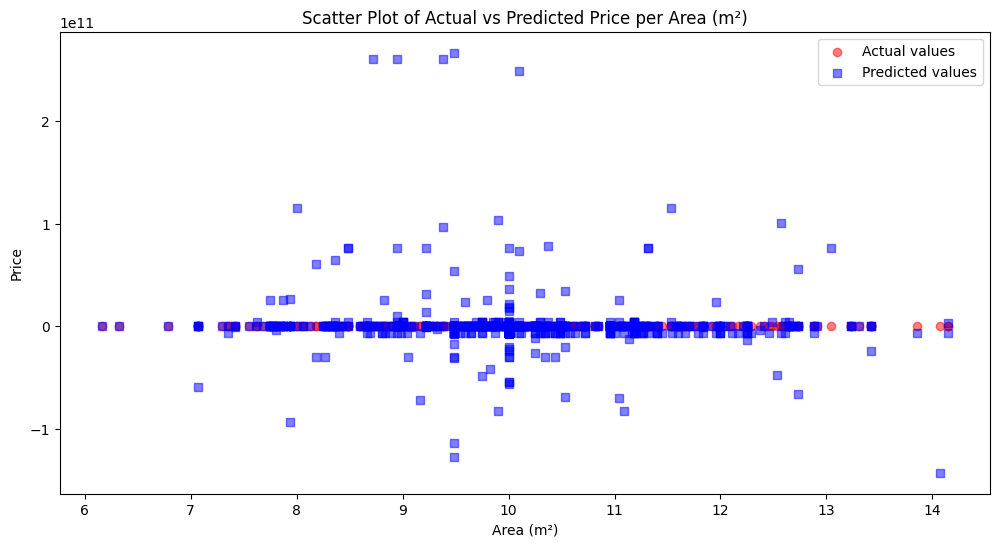

In [36]:
plot_actual_vs_predicted(X_validation, y_validation, y_pred_validation, "Area (m²)", "Area (m²)", "Price")

#### Conclusion

- Linear Regression is a supervised learning algorithm, used to estimate the relationship between independent variables and dependent variables. It is a statistical method used to find the best linear function to represent this relationship.
- Based on the assumption that the correlation between variables is linear, this algorithm predicts the value of the target variable from the values ​​of the input variables.
- This method is considered Simple Regression, prone to Overfitting with large data sets
- This method is also unstable, when the value of random_state changes, it can lead to fluctuations in the performance of the model.